In [117]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
import numpy as np
from PIL import Image
# to calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import confusion_matrix


In [118]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    


In [ ]:
df = pd.read_csv(r"finaldata.csv")
le = LabelEncoder()
le.fit(df['born'])
LabelEncoder()
print(list(le.classes_))
df['label'] = le.transform(df['born'])
print(df.sample(10))
#x_train, x_test, y_train, y_test = train_test_split(df)

Text(0.5, 1.0, 'Cell Type')

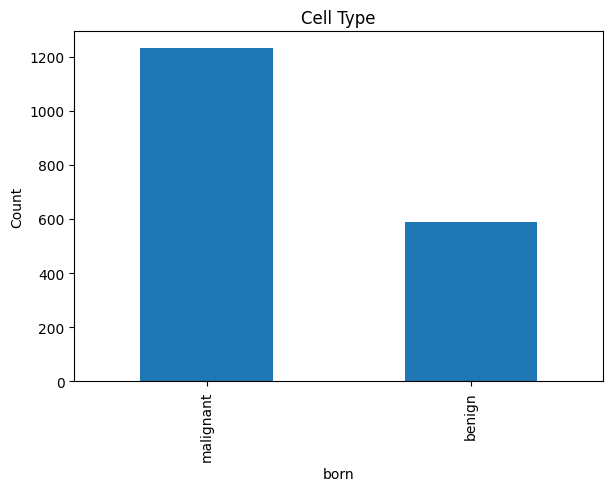

In [120]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
df['born'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type')

In [ ]:
from sklearn.utils import resample
print(df['label'].value_counts())
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]


#n_samples = 900
#df_0_balanced = resample(df_0, replace = True, n_samples=n_samples, random_state = 42)
#df_1_balanced = resample(df_1, replace = True, n_samples=n_samples, random_state = 42)


#dfb = pd.concat([df_0_balanced, df_1_balanced])
print(df['label'].value_counts())


In [123]:
df['image'] = df['name'].map(lambda x: np.asarray(Image.open(x).resize((128,128))))


In [ ]:
print(df)

In [127]:
X = np.asarray(df['image'].tolist())
X = X/255
Y = df['label']
Y_cat = to_categorical(Y, num_classes = 2)
x_train, x_test, y_train, y_test = train_test_split(X,Y_cat, test_size = 0.25, random_state = 40)

In [128]:
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (128,128,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))

    #Second Layer
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))

    #Third Layer
    model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))

    #Fourth Layer
    model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))

    #Flattening the layers
    model.add(Flatten())

    #Adding the dense layer
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.4))

    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.4))

    model.add(Dense(2, activation = 'sigmoid')) 
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
# Train
#You can also use generator to use augmentation during training.




In [ ]:

batch_size = 16 
epochs = 10

history = model.fit(x_train,y_train,epochs = epochs, batch_size = batch_size, validation_data = 
(x_test,y_test), verbose = 2)

score = model.evaluate(x_test,y_test)
print('Test accuracy:', score[1])

# Get predictions
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)




Sensitivity: 0.8263665594855305
Specificity: 0.7430555555555556
f1: 0.8027638531364314


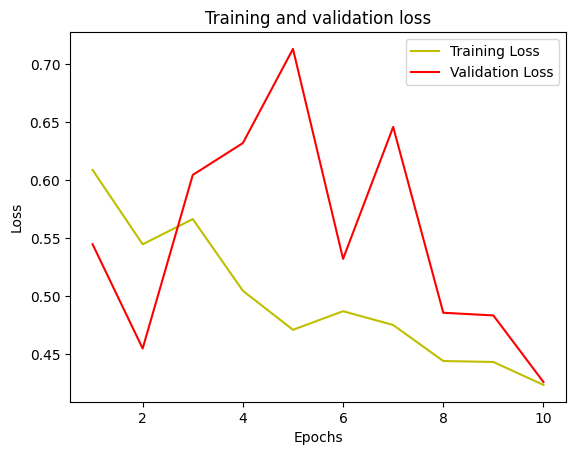

In [130]:
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_true, y_pred, average='weighted') 
    
    return sensitivity, specificity, f1
    
sensitivity, specificity, f1 = calculate_metrics(y_true, y_pred)

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'f1: {f1}')


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range (1, len(loss)+1)
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

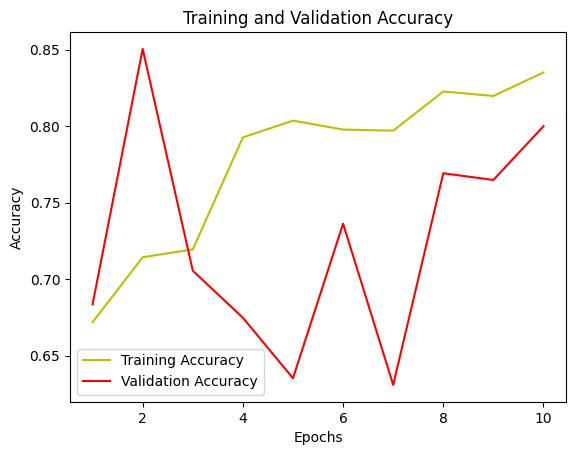

In [131]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show
